In [1]:
from keras.models import Sequential, load_model
from keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

In [2]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


(60000, 10)

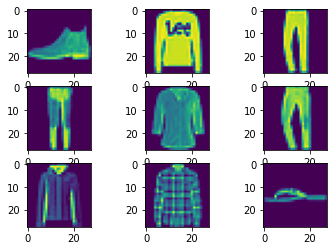

In [4]:
# Load Data
(x_train,y_train),(x_test, y_test) = fashion_mnist.load_data()
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_test[i])
print(x_train.shape, y_train.shape)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train.shape

In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [6]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 50, batch_size = 64, validation_split = 0.2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
750/750 [==============================] - 17s 8ms/step - loss: 0.4367 - acc: 0.8426 - val_loss: 0.3235 - val_acc: 0.8796
Epoch 2/50
750/750 [==============================] - 5s 7ms/step - loss: 0.2720 - acc: 0.9011 - val_loss: 0.2726 - val_acc: 0.9030
Epoch 3/50
750/750 [==============================] - 5s 7ms/step - loss: 0.2215 - acc: 0.9185 - val_loss: 0.2417 - val_acc: 0.9111
Epoch 4/50
750/750 [==============================] - 5s 7ms/step - loss: 0.1880 - acc: 0.9315 - val_loss: 0.2410 - val_acc: 0.9099
Epoch 5/50
750/750 [==============================] - 6s 8ms/step - loss: 0.1663 - acc: 0.9392 - val_loss: 0.2216 - val_acc: 0.9174
Epoch 6/50
750/750 [==============================] - 6s 8ms/step - loss: 0.1384 - acc: 0.9488 - val_loss: 0.2196 - val_acc: 0.9268
Epoch 7/50
750/750 [==============================] - 5s 7ms/step - loss: 0.1180 - acc: 0.9559 - val_loss: 0.2330 - val_acc: 0.9215
Epoch 8/50
750/750 [==============================] - 5s 7ms/step - loss: 0

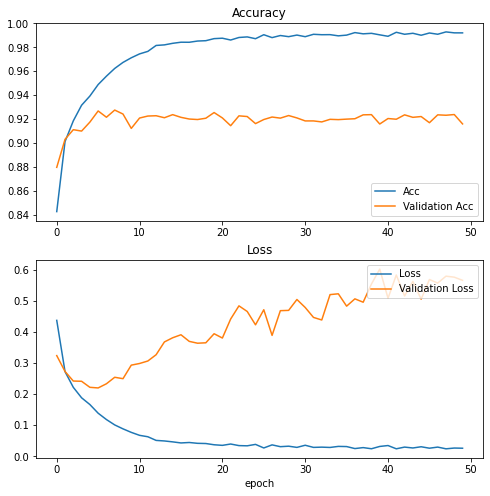

In [7]:
plot_history(his)

In [9]:
model.save('CNN_fashion_mnist.h5')


In [11]:
x_test_2 = x_test.reshape(10000, 28,28)

In [12]:
label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Mẫu muốn nhận dạng:2


'Trouser'

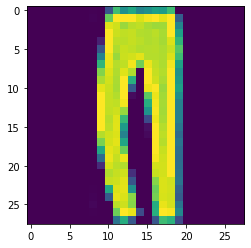

In [14]:
b = int(input('Mẫu muốn nhận dạng:'))
plt.imshow(x_test_2[b])
label[np.argmax(model.predict(x_test_2)[b])]

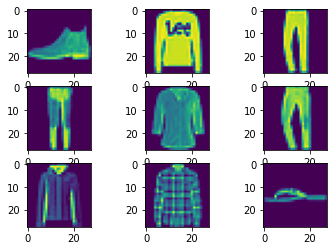

In [15]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_test_2[i])